In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import random
import os
from sklearn.model_selection import train_test_split

In [2]:
print(os.getcwd())
os.chdir('c:\\Users\\Gyanprakash\\Desktop\\Data-Science\\NLP')

c:\Users\Gyanprakash\Desktop\Data-Science\NLP\RNN


In [3]:
df = pd.read_csv(r'LSTM/fake_news_classifier/train.csv')

In [4]:
def random_values(feature_name:str,end=6):
    for i in range(0,end):
        # print(df[feature_name].sample(end))
        indx = np.random.randint(df.shape[0])
        print(f'{indx}: {df[feature_name].iloc[indx]}')

In [5]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df = df.dropna()
df.reset_index(inplace=True)

In [8]:
df.isnull().sum()

index     0
id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
df.shape

(18285, 6)

In [10]:
df = df.iloc[:5000]

In [11]:
df.shape

(5000, 6)

In [12]:
X = df['title']

In [13]:
X

0       House Dem Aide: We Didn’t Even See Comey’s Let...
1       FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                       Why the Truth Might Get You Fired
3       15 Civilians Killed In Single US Airstrike Hav...
4       Iranian woman jailed for fictional unpublished...
                              ...                        
4995    The Arcturian Group by Marilyn Raffaele Octobe...
4996    Comment on Rachel Maddow declares that a Trump...
4997    HILLARY CLINTON is being funded by the same Mu...
4998                        Предикторские свойства толпы?
4999    Even If You Hate Trump, What this Leftist Just...
Name: title, Length: 5000, dtype: object

In [14]:
df = df.drop('index',axis=1)

In [15]:
y = df['label']

In [16]:
y.value_counts()

label
0    2836
1    2164
Name: count, dtype: int64

In [17]:
y


0       1
1       0
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: label, Length: 5000, dtype: int64

In [18]:
## tensorflow
from keras.layers import (Embedding,
                          LSTM,
                          Dense,
                          Bidirectional)

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer

## NLTK
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm

In [19]:
ps = PorterStemmer()

In [20]:
## Preprocessing
corpus = []
for i in tqdm(range(0,len(X))):
    txt = re.sub('[^a-zA-Z]',' ',X[i])
    txt = txt.lower()
    txt = txt.split()

    txt = [ps.stem(word) for word in txt if not word in stopwords.words('english')]
    txt = ' '.join(txt)
    corpus.append(txt)

100%|██████████| 5000/5000 [00:13<00:00, 384.24it/s]


In [21]:
len(corpus)

5000

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts=corpus)

In [23]:
corpus_docs = tokenizer.texts_to_sequences(texts=corpus) # I am assigning number to text. Transforming each text in texts to a sequence of integers.

In [24]:
print(f' my vocab has {len(tokenizer.word_index)} unique words')

 my vocab has 7553 unique words


In [25]:
# Checking the max lenght of sentence present in the corpus
max_len = 0
for i in range(0, len(corpus_docs)):
    try:
        if len(corpus_docs[i]) > max_len:
            max_len = len(corpus_docs[i])
    except:
        pass

print(f'words max len in corpus is: {max_len}')


words max len in corpus is: 47


In [26]:
len(corpus_docs[4999])

7

In [27]:
padded_docs = pad_sequences(sequences=corpus_docs,maxlen=47,padding='post')

In [28]:
len(padded_docs[4999])

47

## Model

In [29]:
X.shape[0] , len(tokenizer.word_index)+1

(5000, 7554)

In [30]:
padded_docs

array([[ 29, 175, 259, ...,   0,   0,   0],
       [789,   6,   7, ...,   0,   0,   0],
       [353, 878,  25, ...,   0,   0,   0],
       ...,
       [  6,   7, 146, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 56, 393,   4, ...,   0,   0,   0]])

In [31]:
y

0       1
1       0
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: label, Length: 5000, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
     np.array(padded_docs), np.array(y), test_size=0.23, random_state=42)


In [33]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3850, 47)
X_test shape: (1150, 47)
y_train shape: (3850,)
y_test shape: (1150,)


## Best Model

```from keras.layers import BatchNormalization, Dropout, Bidirectional, LSTM, Embedding, Dense
from keras.losses import binary_crossentropy
from tensorflow import keras
from sklearn.utils import class_weight
from keras.callbacks import LearningRateScheduler , EarlyStopping

initializer = keras.initializers.HeNormal()
regularizer = keras.regularizers.l2(l2=0.2)
activation_lstm = keras.activations.relu

model_features = 100
model = keras.Sequential(name='LSTM_model')

model.add(Embedding(
    input_dim=len(tokenizer.word_index)+1,  # The "+1" accounts for the reserved index 0 in the word index (since word indices start from 1 and not 0)
    output_dim=model_features, input_length=47
))
model.add(Bidirectional(LSTM(units=32, activation=activation_lstm, kernel_regularizer=regularizer, kernel_initializer=initializer,return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.9))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(units=16, activation=activation_lstm, kernel_regularizer=regularizer, kernel_initializer=initializer,return_sequences=False))) 

model.add(Dense(units=1, activation='sigmoid'))

# Reduce the learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss=binary_crossentropy, metrics=['accuracy'])

model.summary()
```



In [38]:
from keras.layers import BatchNormalization, Dropout, Bidirectional, LSTM, Embedding, Dense
from keras.losses import binary_crossentropy
from tensorflow import keras
from sklearn.utils import class_weight
from keras.callbacks import LearningRateScheduler , EarlyStopping

initializer = keras.initializers.HeNormal()
regularizer = keras.regularizers.l2(l2=0.2)
activation_lstm = keras.activations.elu

model_features = 100
model = keras.Sequential(name='LSTM_model')

model.add(Embedding(
    input_dim=len(tokenizer.word_index)+1,  # The "+1" accounts for the reserved index 0 in the word index (since word indices start from 1 and not 0)
    output_dim=model_features, input_length=47
))
model.add(Bidirectional(LSTM(units=16, activation=activation_lstm, kernel_regularizer=regularizer, kernel_initializer=initializer,return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.9))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(units=16, activation='relu',return_sequences=True))) 
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(units=16, activation='relu',return_sequences=False))) 
model.add(Dense(units=1, activation='sigmoid'))

# Reduce the learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss=binary_crossentropy, metrics=['accuracy'])

model.summary()


def lr_schedule(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * np.exp(-0.1)

# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Early stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=2,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

model.compile(optimizer=optimizer, loss=binary_crossentropy, metrics=['accuracy'])

# Training the model with callbacks
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,
                    batch_size=32, callbacks=[lr_scheduler, early_stopping])

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 47, 100)           755400    
                                                                 
 bidirectional_6 (Bidirectio  (None, 47, 32)           14976     
 nal)                                                            
                                                                 
 batch_normalization_6 (Batc  (None, 47, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 47, 32)            0         
                                                                 
 batch_normalization_7 (Batc  (None, 47, 32)           128       
 hNormalization)                                                 
                                                        

Text(0.5, 1.0, 'val_loss- 1.352 and loss- 0.557')

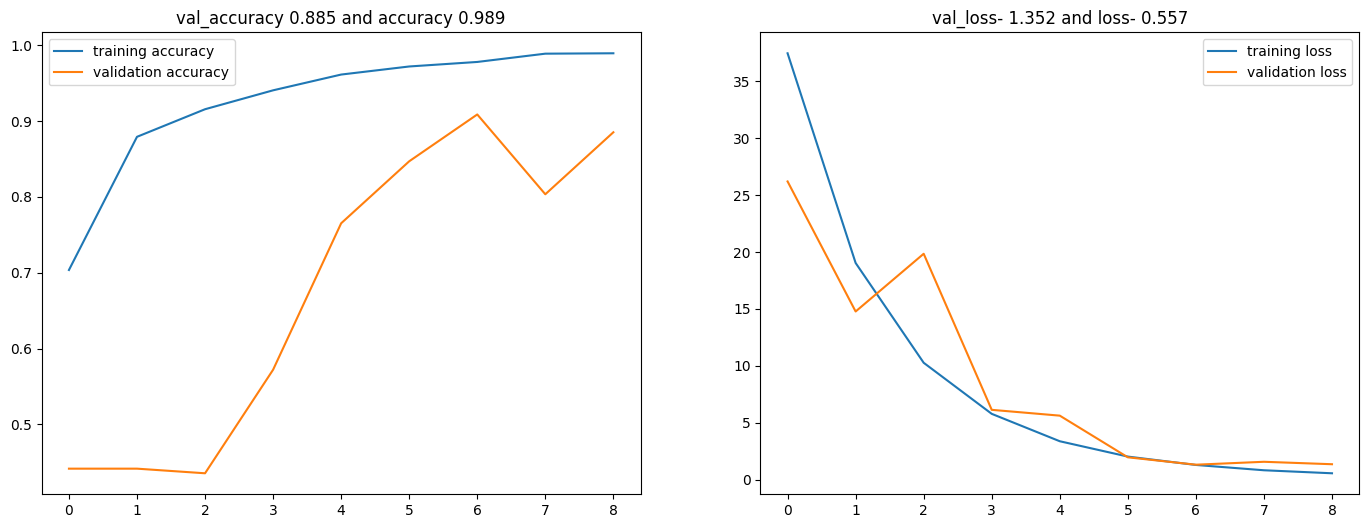

In [39]:
plt.subplots(nrows=1,ncols=2,figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])   
plt.legend(['training accuracy','validation accuracy'])
plt.title(f'val_accuracy {round(history.history["val_accuracy"][8],ndigits=3)} and accuracy {round(history.history["accuracy"][8],ndigits=3)}')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title(f'val_loss- {round(history.history["val_loss"][8],ndigits=3)} and loss- {round(history.history["loss"][8],ndigits=3)}')